In [1]:
pip install xgboost

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import BernoulliNB
import joblib
from sklearn.linear_model import SGDRegressor ,Ridge ,Lasso ,ElasticNet
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Load the Data

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d fmendes/fmendesdat263xdemos


Dataset URL: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos
License(s): unknown
  0% 0.00/296k [00:00<?, ?B/s]
100% 296k/296k [00:00<00:00, 550MB/s]


In [9]:
!unzip /content/fmendesdat263xdemos.zip -d data


Archive:  /content/fmendesdat263xdemos.zip
  inflating: data/calories.csv       
  inflating: data/exercise.csv       


In [10]:
features_path = os.path.join(os.getcwd(), "/content/data/exercise.csv")
target_path = os.path.join(os.getcwd(), "/content/data/calories.csv")

In [11]:
features_df= pd.read_csv(features_path ,sep=",",engine='python')
target_df =  pd.read_csv(target_path ,sep=",",engine='python')


In [12]:
features_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [13]:
target_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [14]:
features_df.shape , target_df.shape

((15000, 8), (15000, 2))

In [15]:
target_df.info() , features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


(None, None)

In [16]:
features_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [17]:
print(features_df.isnull().sum() , target_df.isnull().sum())


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64 User_ID     0
Calories    0
dtype: int64


In [18]:
# Concatenate features and target
df = pd.merge(features_df, target_df, on='User_ID')
df=df.drop('User_ID',axis=1)

In [19]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Exploratory Data Analysis (EDA)



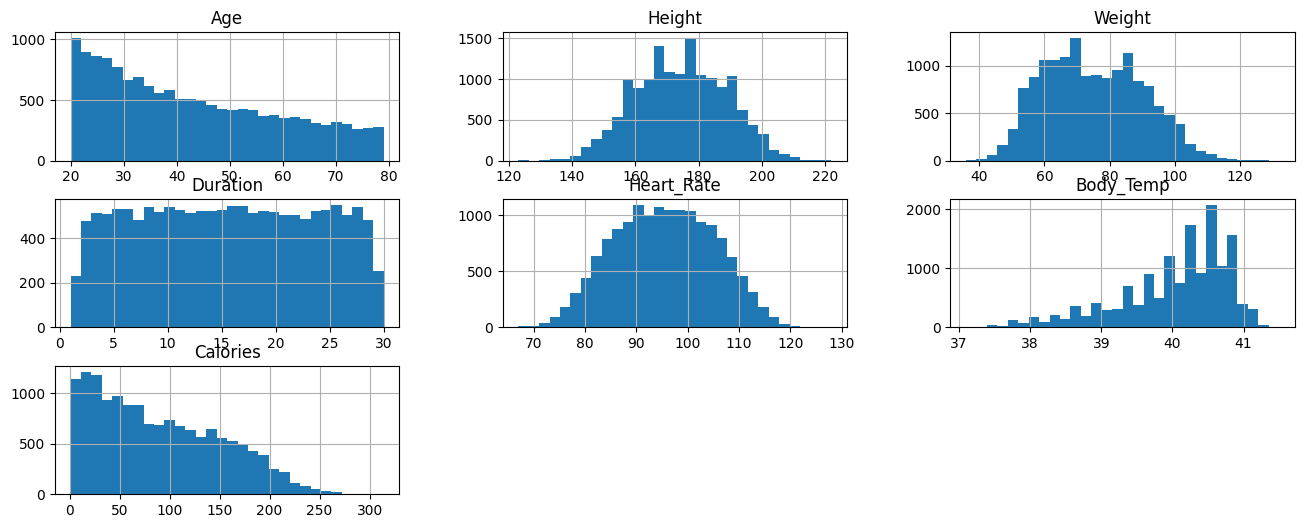

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(figsize=(16,6), bins = 30);


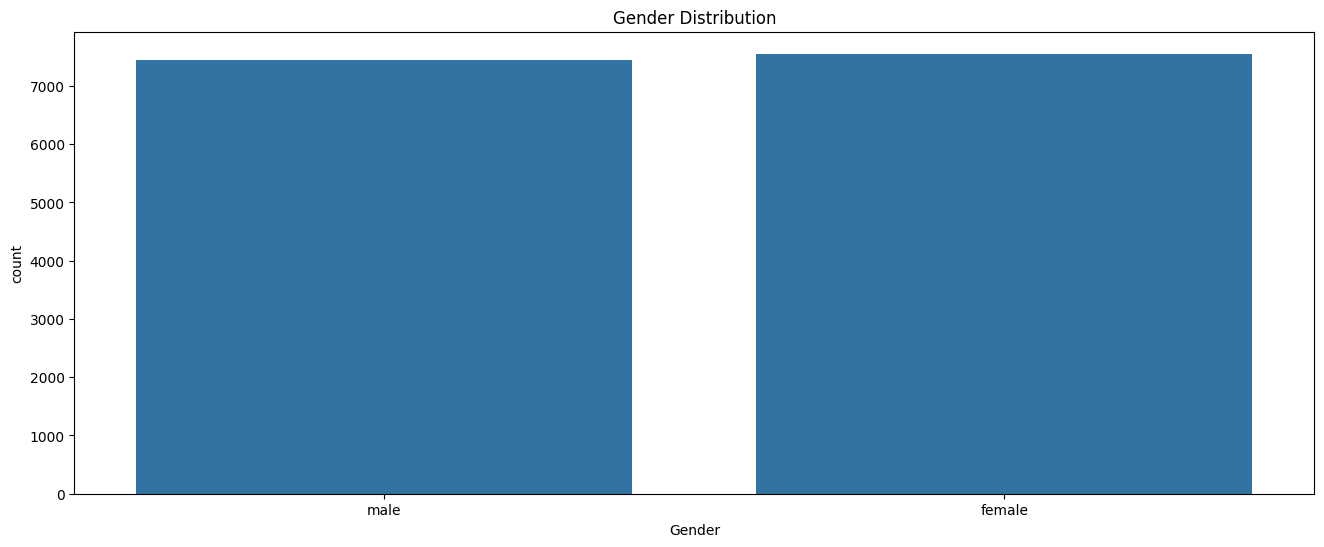

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

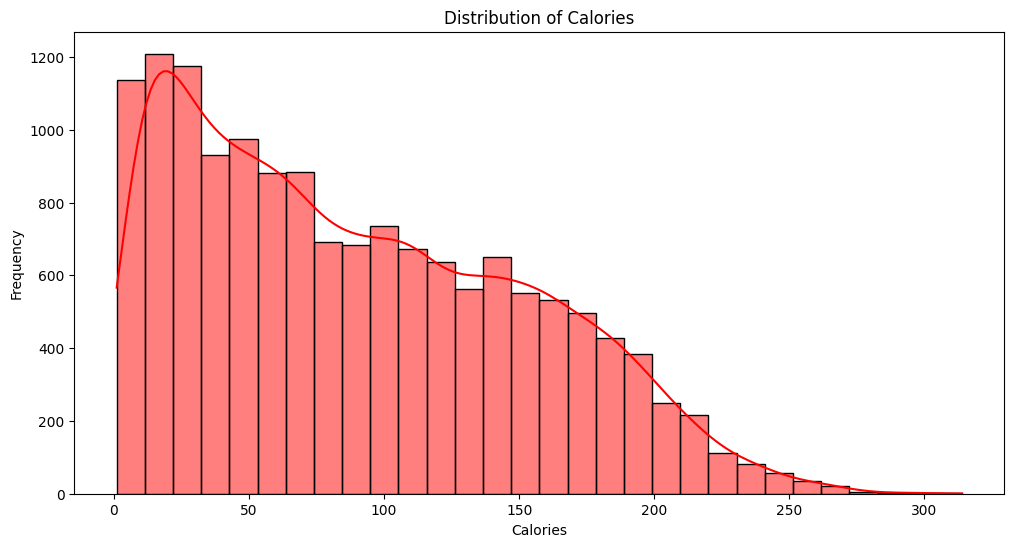

In [ ]:
#Histogram + KDE: Distribution of Calories
plt.figure(figsize=(12,6))
sns.histplot(df["Calories"]  ,kde=True ,bins=30 ,color="red")
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


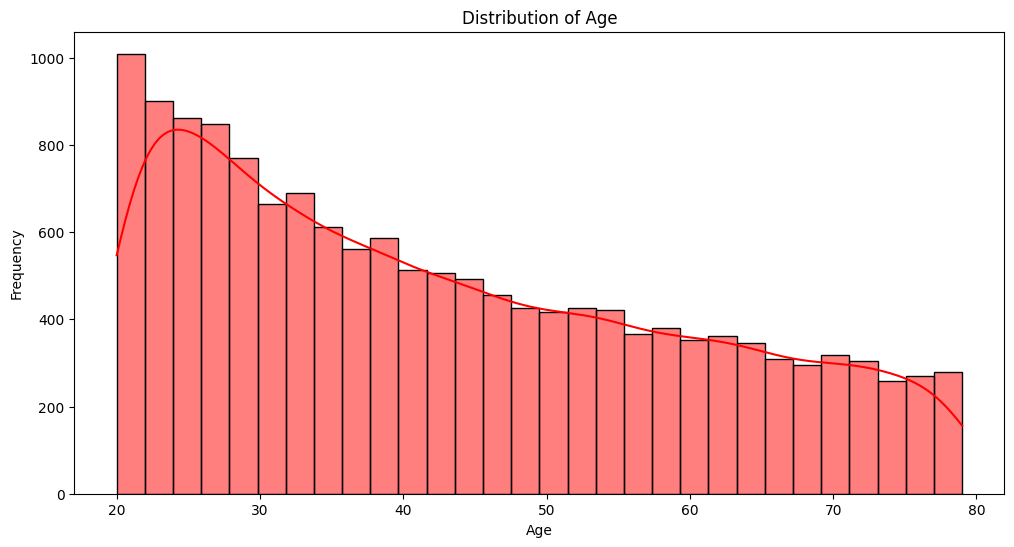

In [ ]:
#Histogram + KDE: Distribution of Age
plt.figure(figsize= (12,6))
sns.histplot(df["Age"] ,kde=True ,bins=30 ,color="red")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

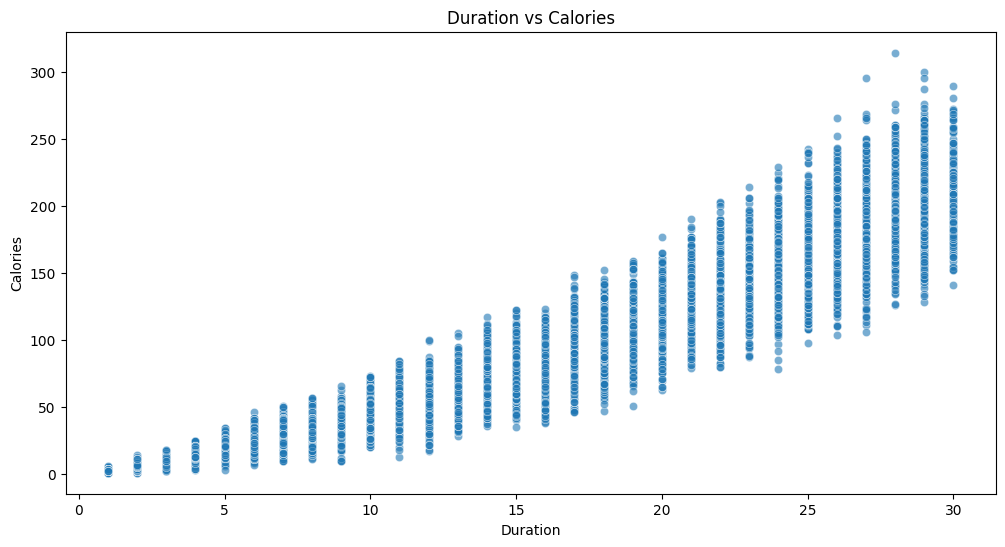

In [ ]:
#catter Plot: Relationship between Duration and Calories
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Duration'], y=df['Calories'],alpha = 0.6 )
plt.title("Duration vs Calories")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

<ipython-input-35-a5958d2c1134>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Gender"], y=df["Calories"], palette="coolwarm")


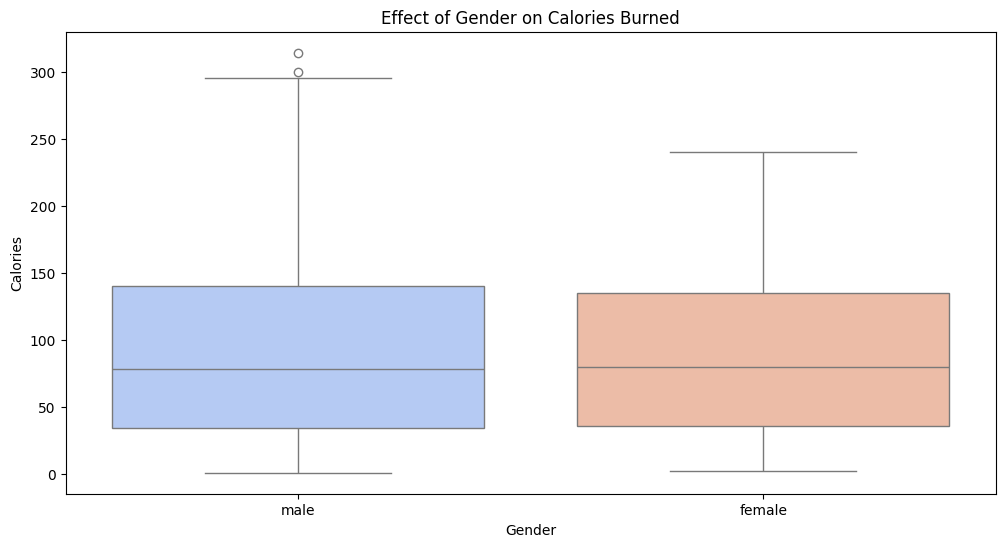

In [ ]:
# Boxplot: Effect of Gender on Calories Burned
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Gender"], y=df["Calories"], palette="coolwarm")
plt.title("Effect of Gender on Calories Burned")
plt.xlabel("Gender")
plt.ylabel("Calories")
plt.show();

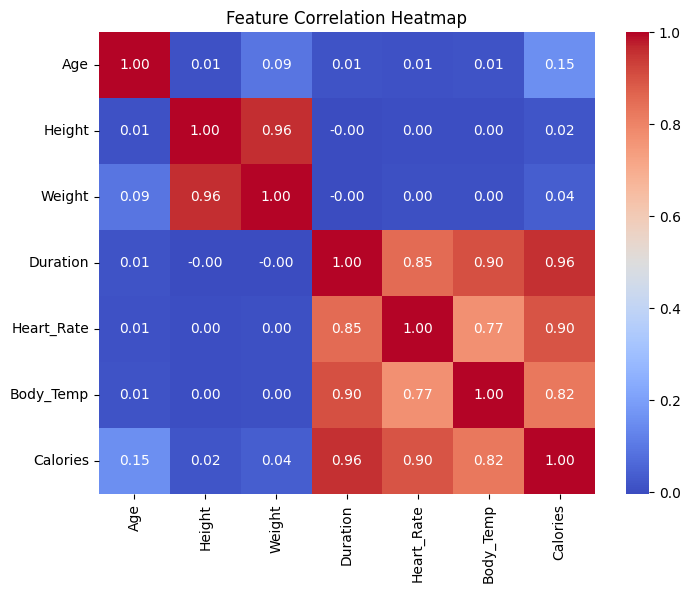

In [ ]:
# Heatmap: Correlation between Calories and Other Features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True ), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# split data to training , validation and testing

In [20]:
# Define features (X) and target (y)
X = df.drop('Calories', axis=1)
y = df['Calories']


In [21]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)  # Split temp into 50% validation, 50% test



In [22]:
X_train.shape ,y_train.shape , X_val.shape , y_val.shape , X_test.shape , y_test.shape

((10500, 7), (10500,), (2250, 7), (2250,), (2250, 7), (2250,))

#Data Transformation

In [23]:
Num_features = X.select_dtypes(include=np.number).columns.tolist()
cat__features = X.select_dtypes(exclude=np.number).columns.tolist()

In [24]:

Num_features,cat__features


(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'],
 ['Gender'])

In [25]:
# Numerical pipeline
num_pipeline = Pipeline(
    [
        ("imputer",SimpleImputer(strategy="median")),
        ("scalar",StandardScaler())
    ]
)
# categorigal pipeline
cat_pipeline = Pipeline (
    [
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"))
    ]
)

#target pipeline
y_pipeline = Pipeline([
    ('scalar', StandardScaler())
])

# all pipeline
preprocessor = ColumnTransformer(
    [
        ("num",num_pipeline,Num_features),
        ("cat",cat_pipeline,cat__features)
    ]

)

In [26]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

In [103]:
y_train_transformed = y_pipeline.fit_transform(y_train.values.reshape(-1, 1))

y_val_transformed = y_pipeline.transform(y_val.values.reshape(-1,1))

y_test_transformed = y_pipeline.transform(y_test.values.reshape(-1,1))

In [28]:
import joblib
joblib.dump(preprocessor, "preprocessor_pridect_calories.joblib")

['preprocessor_pridect_calories.joblib']

#Evaluate Regression Function


In [123]:
def evaluate_regression_model(x_test_scaled ,y_true , predictor  , scaler):


    y_predict_scaled = predictor.predict(x_test_scaled)

    y_pred = scaler.inverse_transform(y_predict_scaled.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("="*30)
    print("Evaluation Metrics:")
    print(f" RMSE: {rmse:.4f}")
    print(f" MSE : {mse:.4f}")
    print(f" R² Score (Accuracy): {r2:.4f}")
    print("="*30)




#Build Model

# ***SGDRegression***

In [108]:
sgd_regressor = SGDRegressor(random_state= 42 ,eta0=0.01 ,l1_ratio=0.10 )
sgd_regressor.fit(X_train_transformed, y_train_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(l1_ratio=0.1, random_state=42)

In [124]:
evaluate_regression_model(X_test_transformed ,y_test , sgd_regressor  , y_pipeline)


Evaluation Metrics:
 RMSE: 11.1395
 MSE : 124.0880
 R² Score (Accuracy): 0.9674


#Lasso

In [113]:
regressor_lasso = Lasso(random_state= 42 ,alpha=0.0001)
regressor_lasso.fit(X_train_transformed, y_train_transformed)

Lasso(alpha=0.0001, random_state=42)

In [125]:
evaluate_regression_model(X_test_transformed ,y_test , regressor_lasso  , y_pipeline)


Evaluation Metrics:
 RMSE: 11.1418
 MSE : 124.1394
 R² Score (Accuracy): 0.9674


In [115]:
regressor_lasso.coef_

array([ 0.13583985, -0.0407054 ,  0.07245298,  0.88168945,  0.30920759,
       -0.2138516 , -0.02204422])

#**Ridge**

In [116]:
regressor_gidge = Ridge(random_state= 42 ,alpha=0.0001)
regressor_gidge.fit(X_train_transformed, y_train_transformed)

Ridge(alpha=0.0001, random_state=42)

In [126]:
evaluate_regression_model(X_test_transformed ,y_test , regressor_gidge  , y_pipeline)


Evaluation Metrics:
 RMSE: 11.1419
 MSE : 124.1430
 R² Score (Accuracy): 0.9674


# *` Elastic Net `*

In [119]:
regressor_elastic = ElasticNet(random_state= 42  ,l1_ratio=0.18 ,alpha=0.0001)
regressor_elastic.fit(X_train_transformed, y_train_transformed)

ElasticNet(alpha=0.0001, l1_ratio=0.18, random_state=42)

In [127]:
evaluate_regression_model(X_test_transformed ,y_test , regressor_elastic  , y_pipeline)


Evaluation Metrics:
 RMSE: 11.1418
 MSE : 124.1405
 R² Score (Accuracy): 0.9674


# KNN

In [121]:
knn_Regressor = KNeighborsRegressor(n_neighbors=5,p=2)
knn_Regressor.fit(X_train_transformed, y_train_transformed)

KNeighborsRegressor()

In [128]:
evaluate_regression_model(X_test_transformed ,y_test , knn_Regressor  , y_pipeline)


Evaluation Metrics:
 RMSE: 5.4144
 MSE : 29.3156
 R² Score (Accuracy): 0.9923



# Support Vector Machine

# **Linear**

In [137]:
svr_Classifier = SVR(kernel='linear')
svr_Classifier.fit(X_train_transformed, y_train_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [131]:
evaluate_regression_model(X_test_transformed ,y_test , svr_Classifier  , y_pipeline)


Evaluation Metrics:
 RMSE: 11.2923
 MSE : 127.5159
 R² Score (Accuracy): 0.9666


# **non-Linear(Ploynomial)**

In [132]:
svr_poly_Classifier = SVR(kernel='poly',degree=2 , coef0=3, max_iter=1000 ,C=0.7)
svr_poly_Classifier.fit(X_train_transformed, y_train_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(C=0.7, coef0=3, degree=2, kernel='poly', max_iter=1000)

In [133]:
evaluate_regression_model(X_test_transformed ,y_test , svr_poly_Classifier  , y_pipeline)


Evaluation Metrics:
 RMSE: 4.2338
 MSE : 17.9254
 R² Score (Accuracy): 0.9953


# **non-Linear(RBF)**




In [134]:
svr_RBF_Classifier = SVR(kernel='rbf', C=0.7, gamma='auto')
svr_RBF_Classifier.fit(X_train_transformed, y_train_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.7, gamma='auto')

In [135]:
evaluate_regression_model(X_test_transformed ,y_test , svr_RBF_Classifier  , y_pipeline)


Evaluation Metrics:
 RMSE: 3.0766
 MSE : 9.4652
 R² Score (Accuracy): 0.9975


# Random Forest


In [160]:
rf = RandomForestRegressor(random_state=42)



In [151]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_transformed, y_train_transformed)





Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7921d1658610>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7921d44662d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7921d44bbd50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7921d16596d0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [152]:
print("Best Parameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_


Best Parameters: {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 774}


In [156]:
evaluate_regression_model(X_test_transformed ,y_test , best_rf_model  , y_pipeline)


Evaluation Metrics:
 RMSE: 3.2743
 MSE : 10.7208
 R² Score (Accuracy): 0.9972


# XGBoost


In [86]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42,eval_set=[(X_val_transformed, y_val_transformed)])


In [88]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'min_child_weight': [1, 5]
}

In [89]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [90]:
grid_search.fit(X_train_transformed, y_train_transformed ,verbose=True)


Fitting 3 folds for each of 192 candidates, totalling 576 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:34:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    eval_set=[(array([[ 1.12667207,  2.41566706,  2.32359433, ..., -0.88561894,
        -0.79640414,  1.        ],
       [-0.69622253,  1.15321058,  1.5254979...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [91]:
print(grid_search.best_params_)


{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [96]:
best_model = grid_search.best_estimator_


In [155]:
evaluate_regression_model(X_test_transformed ,y_test , best_model  , y_pipeline)


Evaluation Metrics:
 RMSE: 1.6868
 MSE : 2.8453
 R² Score (Accuracy): 0.9993


In [154]:
joblib.dump(best_model, "best_model_pridect_calories.joblib")

['best_model_pridect_calories.joblib']

#Evaluate RMSE

In [157]:
def evaluate_rmse(rmse, y_true, threshold_small=0.05, threshold_medium=0.15):
    """

    Args:
        rmse (float): The calculated Root Mean Squared Error.
        y_true (pd.Series or np.ndarray): The true target values.
        threshold_small (float): The threshold for considering RMSE as 'small'.
        threshold_medium (float): The threshold for considering RMSE as 'medium'.

    Returns:
        str: An assessment of the RMSE.
    """
    mean_y = y_true.mean()
    rmse_ratio = rmse / mean_y

    print(f"Mean of True Values: {mean_y:.4f}")
    print(f"RMSE Ratio to Mean: {rmse_ratio:.4f}")

    if rmse_ratio <= threshold_small:
        return "Small RMSE: The model is very good"
    elif rmse_ratio <= threshold_medium:
        return "Medium RMSE: The model is acceptable"
    else:
        return "Large RMSE: The model needs improvement"

In [158]:
rmse = 2.8453
evaluate_rmse(rmse, y_test, threshold_small=0.05, threshold_medium=0.15)

Mean of True Values: 90.0520
RMSE Ratio to Mean: 0.0316


'Small RMSE: The model is very good'